In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf_results = pd.read_csv('tf_fool_gaussian.csv')

In [3]:
tf_results.head()

,trial_id,robust_acc,test_loss,time_this_iter_s,done,timesteps_total,episodes_total,training_iteration,experiment_id,date,...,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,experiment_tag,config.learning_rate,config.dropout,config.epochs,config.batch_size
0,2d763446,0.547806,1.554377,96.970397,True,NaN,NaN,1,a2e8b8b7c49e43ffa600b3930c4cbc99,2020-10-06_20-58-57,...,lambda1,140.221.79.11,96.970397,0,1,"1_batch_size=568,dropout=0.76084,epochs=71,lea...",0.084367,0.760842,71,568
1,2d763447,0.769446,0.895710,120.249913,True,NaN,NaN,1,2e849f6f86c2480092ea695a3cda59d8,2020-10-06_20-59-20,...,lambda1,140.221.79.11,120.249913,0,1,"2_batch_size=714,dropout=0.5518,epochs=86,lear...",0.085760,0.551801,86,714
2,2d763448,0.400990,1.278604,92.678964,True,NaN,NaN,1,c51ac30e5fa04c498edcb108dda82be7,2020-10-06_20-58-52,...,lambda1,140.221.79.11,92.678964,0,1,"3_batch_size=606,dropout=0.81471,epochs=63,lea...",0.065826,0.814712,63,606
3,2d763449,0.899876,0.404611,94.076040,True,NaN,NaN,1,b4c5c362e15c4952aba5874a5eb743a9,2020-10-06_20-58-54,...,lambda1,140.221.79.11,94.076040,0,1,"4_batch_size=620,dropout=0.6235,epochs=56,lear...",0.050973,0.623496,56,620
4,2d76344a,0.401327,1.711475,101.020143,True,NaN,NaN,1,27e0ef3785af47be88c387935eac0367,2020-10-06_20-59-01,...,lambda1,140.221.79.11,101.020143,0,1,"5_batch_size=603,dropout=0.81585,epochs=77,lea...",0.082984,0.815848,77,603


In [4]:
pt_results = pd.read_csv('pt_fool_gaussian.csv')

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

In [6]:
tf_results['pca'] = pca.fit_transform(tf_results[['config.learning_rate', 'config.dropout', 'config.epochs', 'config.batch_size']])

In [7]:
pca = PCA(n_components=1)

In [8]:
pt_results['pca'] = pca.fit_transform(pt_results[['config.learning_rate', 'config.dropout', 'config.epochs', 'config.batch_size']])

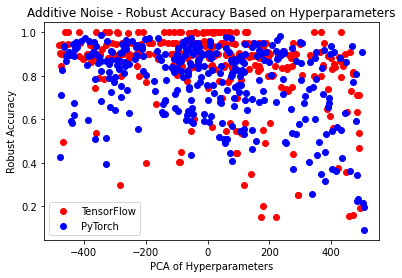

In [9]:
ax = plt.gca()
ax.scatter(tf_results['pca'], tf_results['robust_acc'], color="red", label="TensorFlow")
ax.scatter(pt_results['pca'], pt_results['robust_acc'], color="blue", label="PyTorch")
ax.set_title("Additive Noise - Robust Accuracy Based on Hyperparameters")
ax.set_xlabel("PCA of Hyperparameters")
ax.set_ylabel("Robust Accuracy")
ax.legend()
plt.show()